In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import geopandas as gpd

In [6]:
df = pd.read_csv('Diwali Sales Data.csv', encoding = 'unicode_escape')

In [4]:
df.shape

(11251, 15)

In [5]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


## Data Cleaning 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [7]:
# to drop unrelated/blank columns
df.drop(['Status','unnamed1'], axis=1, inplace = True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


In [27]:
# to checking null values, we will check that is there any null vallue in entire dataframe
pd.isnull(df)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,False,False,False,False,False,False,False,False,False,False,False,False,False
11247,False,False,False,False,False,False,False,False,False,False,False,False,False
11248,False,False,False,False,False,False,False,False,False,False,False,False,False
11249,False,False,False,False,False,False,False,False,False,False,False,False,False


In [25]:
# this will give how many null value in each columns
pd.isnull(df).sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [24]:
df.dropna(inplace = True)
# .dropna allow us to drop null values

In [23]:
df.shape

(11239, 13)

In [28]:
# to change the datatype of a column
df['Amount'] = df['Amount'].astype('int')

In [29]:
df['Amount'].dtypes

dtype('int32')

In [30]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [32]:
# if we wnat to change/rename column_name
df.rename(columns = {'Marital_Status' : 'Shaadi'})
# but we are not going to rename it..

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Shaadi,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206


In [34]:
# describe() --> this method returns description of the data in the DataFrame
df[['Age','Orders','Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


# Exploratory Data Analysis

In [35]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

### Gender 

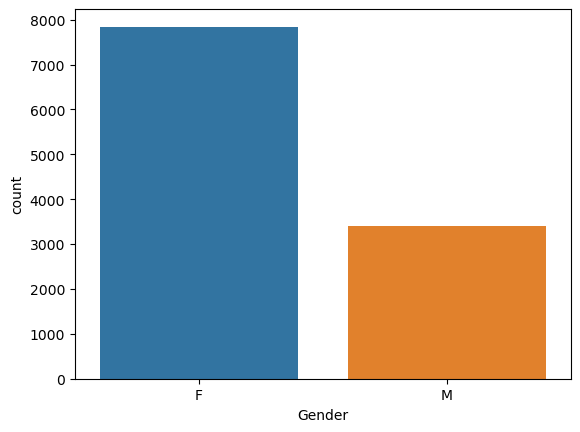

In [13]:
# countplot of Genders

Sales_gen = sns.countplot(x='Gender', data=df)

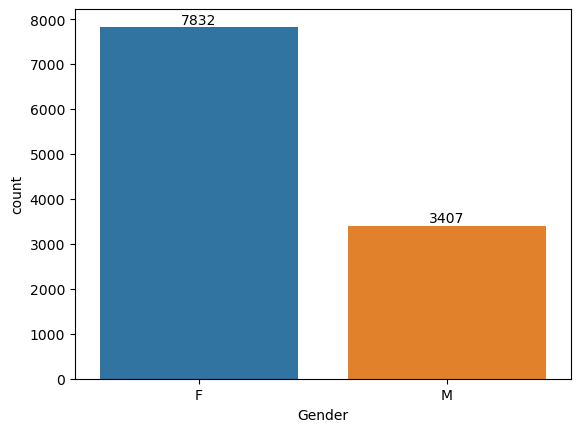

In [39]:
# we want label on both bars
gen = sns.countplot(x='Gender', data=df)
for bars in gen.containers:
    gen.bar_label(bars)

In [40]:
df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

,Gender,Amount
0,F,74335853
1,M,31913276


<Axes: xlabel='Gender', ylabel='Amount'>

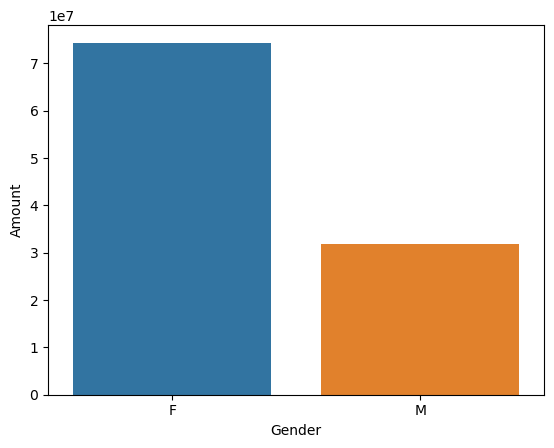

In [41]:
gen_sales = df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.barplot(x='Gender', y='Amount', data= gen_sales)

*The figures above show that women make up the majority of buyers and even have a higher purchasing power than men.*

## Age

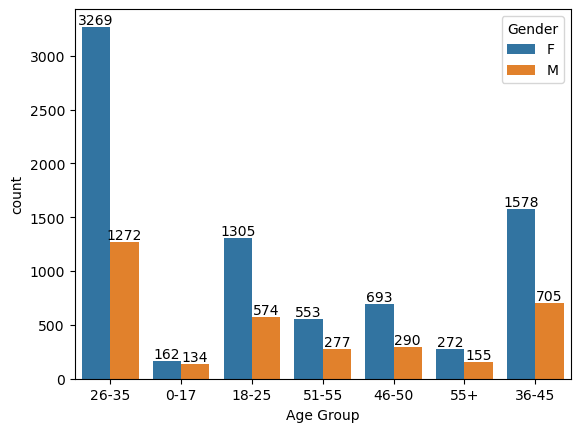

In [46]:
age = sns.countplot(x='Age Group', data=df, hue='Gender')
for bars in age.containers:
    age.bar_label(bars)

In [47]:
age_sale = df.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

<Axes: xlabel='Age Group', ylabel='Amount'>

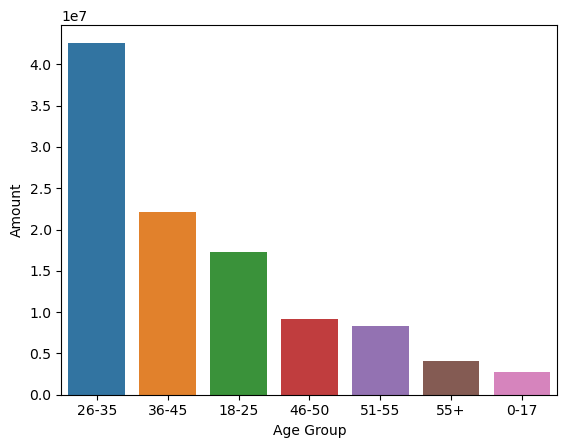

In [50]:
sns.barplot(x='Age Group', y='Amount', data=age_sale)

*The above graphs show that the majority of buyers are female and between the ages of 26 and 35.


In [51]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [54]:
# total no order from top States
df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

,State,Orders
14,Uttar Pradesh,4807
10,Maharashtra,3810
7,Karnataka,3240
2,Delhi,2740
9,Madhya Pradesh,2252
0,Andhra Pradesh,2051
5,Himachal Pradesh,1568
8,Kerala,1137
4,Haryana,1109
3,Gujarat,1066


<Axes: xlabel='State', ylabel='Orders'>

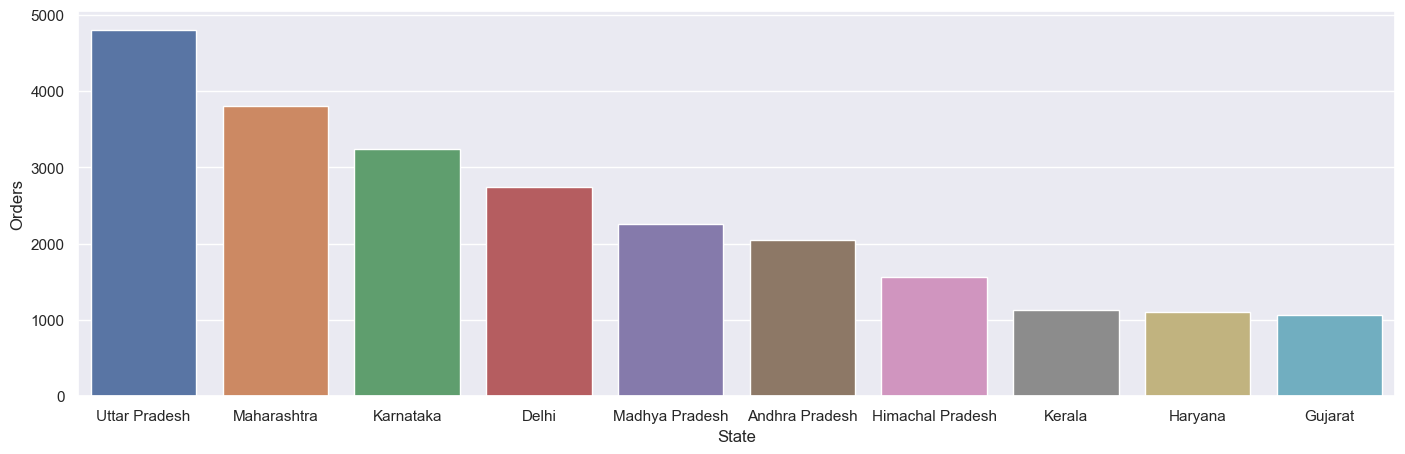

In [59]:
States_Sales = df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

sns.set(rc={'figure.figsize':(17,5)})
sns.barplot(x='State', y='Orders', data=States_Sales)

In [60]:
# total no amount spend from top 10 States
df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

,State,Amount
14,Uttar Pradesh,19374968
10,Maharashtra,14427543
7,Karnataka,13523540
2,Delhi,11603818
9,Madhya Pradesh,8101142
0,Andhra Pradesh,8037146
5,Himachal Pradesh,4963368
4,Haryana,4220175
1,Bihar,4022757
3,Gujarat,3946082


<Axes: xlabel='State', ylabel='Amount'>

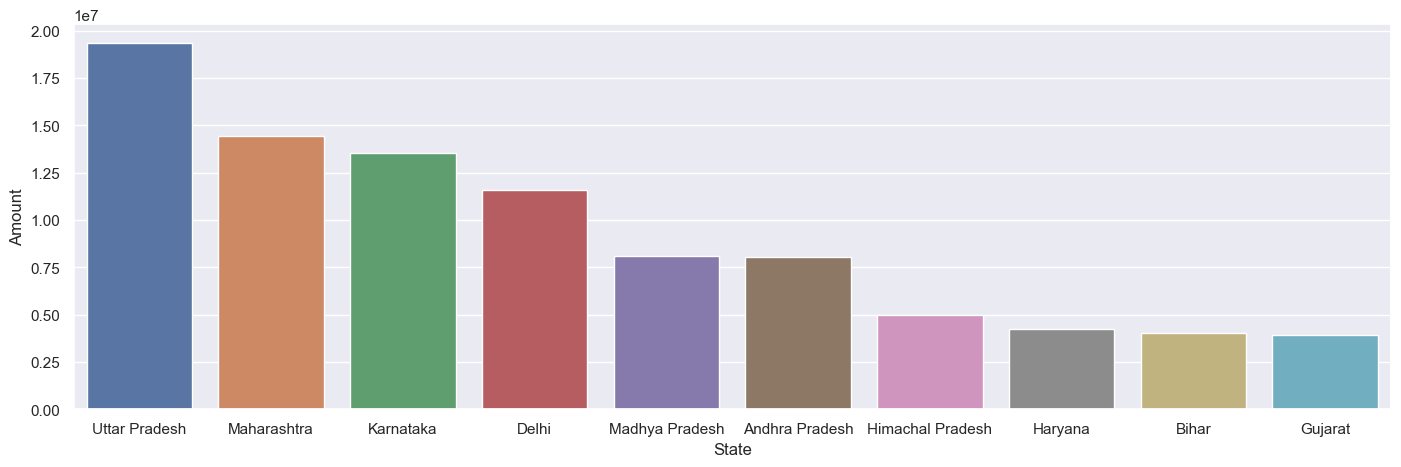

In [61]:
States_Amount_Spent = df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.set(rc={'figure.figsize':(17,5)})
sns.barplot(x='State', y='Amount', data=States_Amount_Spent)

*The graphs above show that the majority of orders and total sales/amount originate from Maharashtra, Karnataka, and Uttar Pradesh, respectively.

In [55]:
map = df.groupby('State')['Orders'].sum()
map = pd.DataFrame(data)

In [57]:
shp_file = gpd.read_file('Maps_with_python-master/Maps_with_python-master/india-polygon.shp')[['st_nm','geometry']]

In [58]:
merged = shp_file.set_index('st_nm').join(map)
merged.fillna(0, inplace=True)

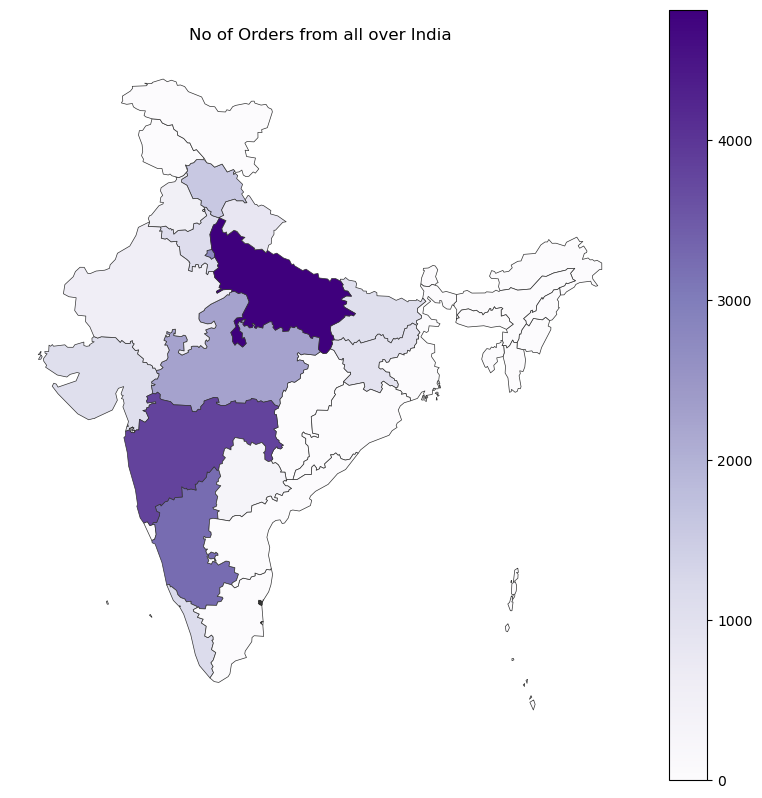

In [59]:
fig, ax = plt.subplots(1, figsize=(10,10)) 
ax.axis('off') 
ax.set_title('No of Orders from all over India',
             fontdict={'fontsize': '12', 'fontweight' : '3'})
fig = merged.plot(column='Orders', cmap='Purples', linewidth=0.5, ax=ax, edgecolor='0.2',legend=True)

## Martial Status

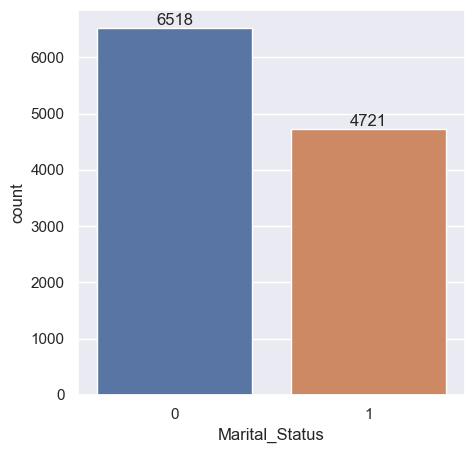

In [72]:
MS = sns.countplot(x='Marital_Status', data=df)

sns.set(rc={'figure.figsize':(2,5)})
for Bars in MS.containers:
    MS.bar_label(Bars)

<Axes: xlabel='Marital_Status', ylabel='Amount'>

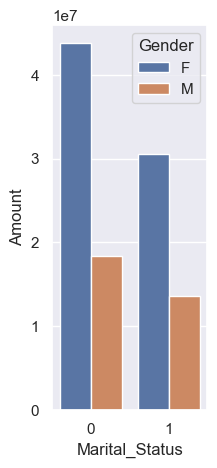

In [73]:
MS_Sales = df.groupby(['Marital_Status', 'Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.set(rc={'figure.figsize':(2,5)})
sns.barplot(x='Marital_Status', y='Amount', data=MS_Sales, hue='Gender')

*The graphs above show that married women make up the majority of buyers, and they have significant purchasing power.*


## Ocupation

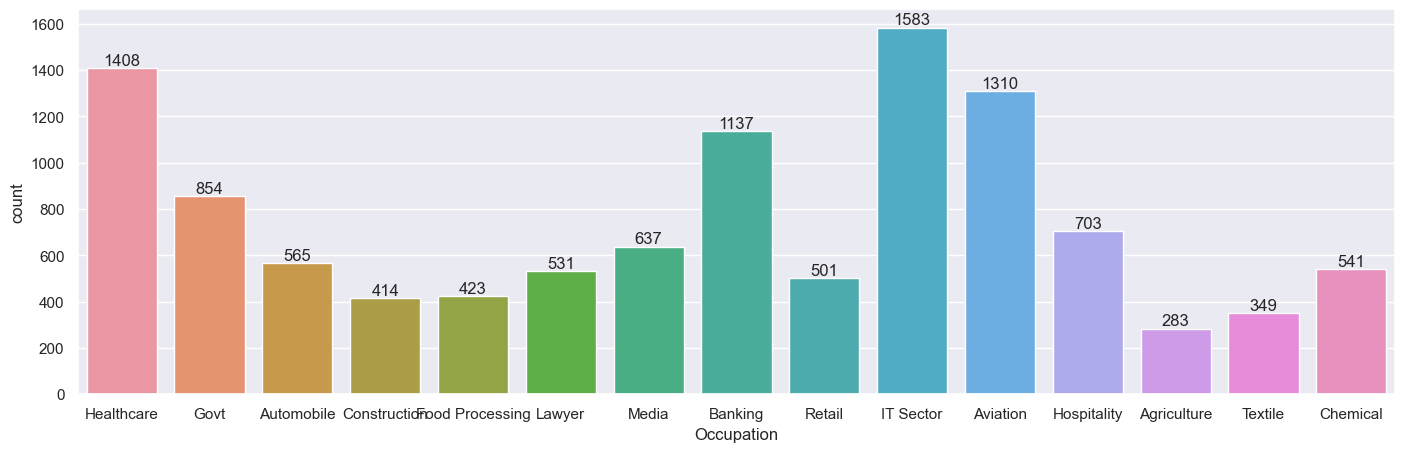

In [77]:
sns.set(rc={'figure.figsize':(17,5)})
occ = sns.countplot(x='Occupation', data=df)

for bars in occ.containers:
    occ.bar_label(bars)

<Axes: xlabel='Occupation', ylabel='Amount'>

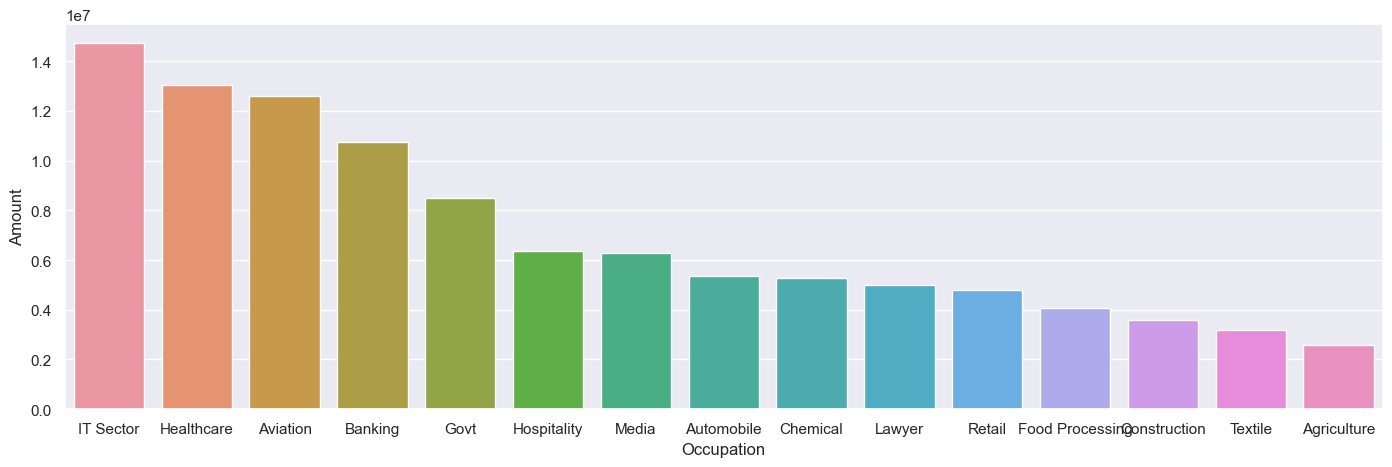

In [80]:
occ_sales = df.groupby(['Occupation'], as_index= False)['Amount'].sum().sort_values(by='Amount', ascending= False)

sns.barplot(x='Occupation', y='Amount', data=occ_sales)

*The following graphs show that the majority of buyers are employed in the IT, healthcare, and aviation sectors.*

## Product Category

In [81]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

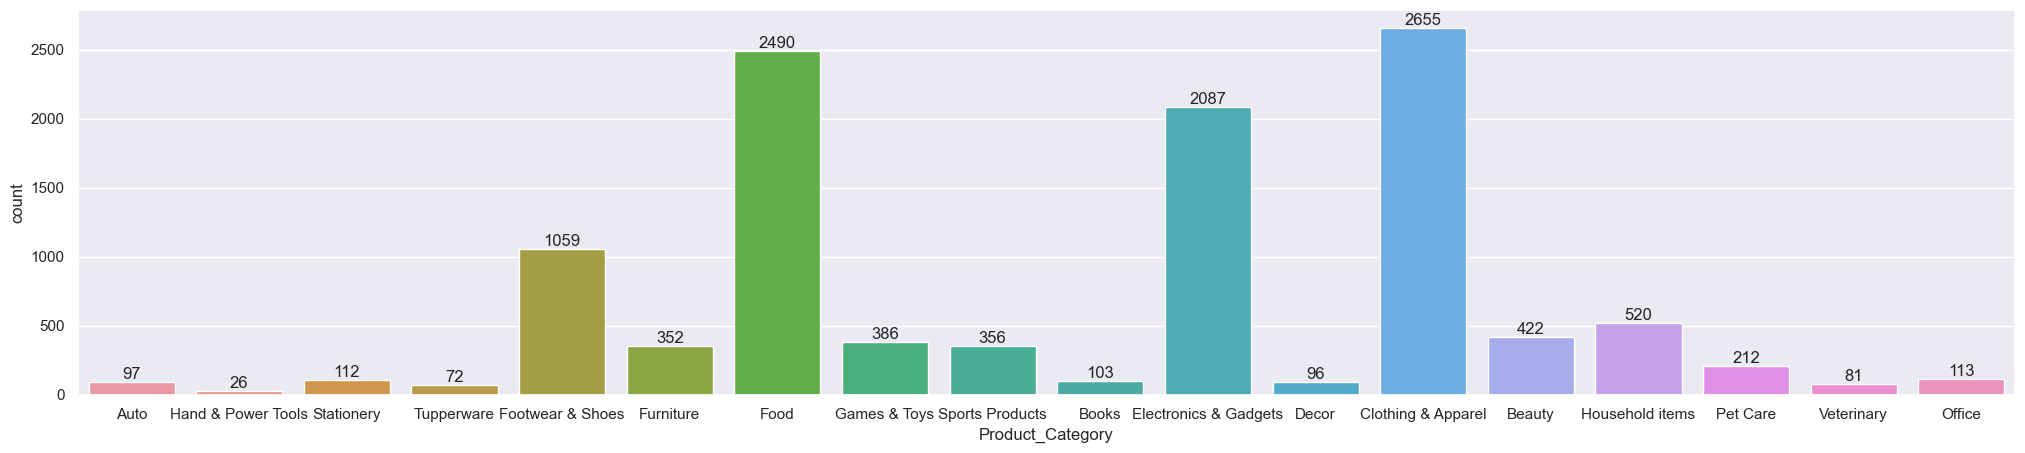

In [85]:
sns.set(rc={'figure.figsize':(25,5)})
Pro_cate = sns.countplot(x='Product_Category', data=df)

for bars in Pro_cate.containers:
    Pro_cate.bar_label(bars)

<Axes: xlabel='Product_Category', ylabel='Amount'>

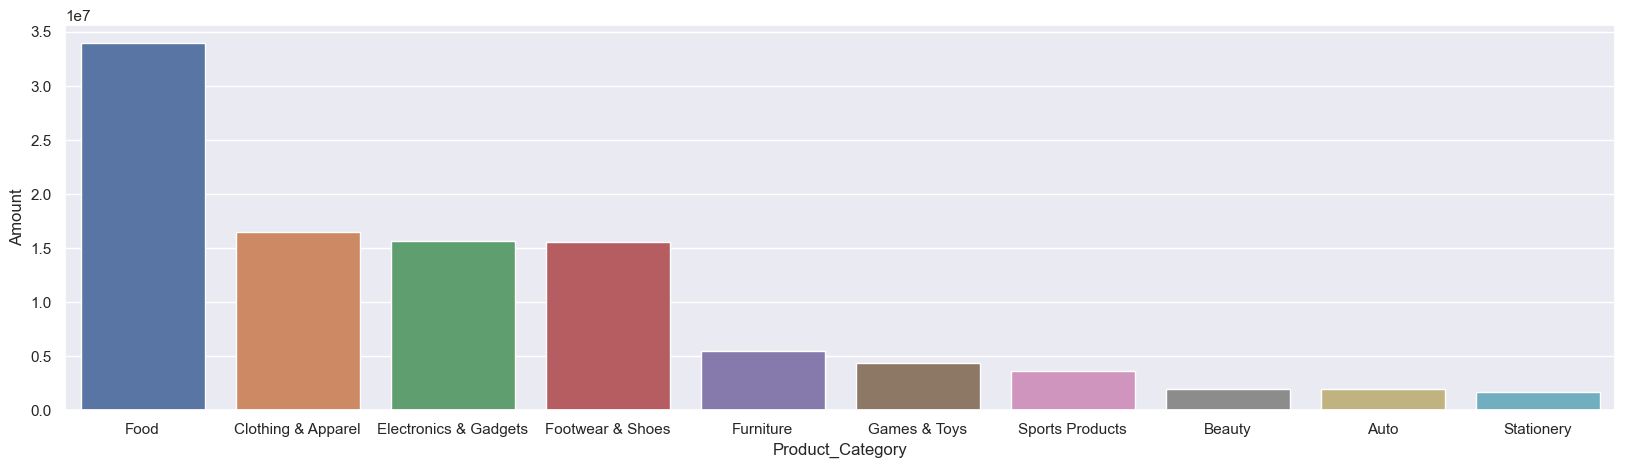

In [92]:
Pro_cate_spent = df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending= False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(x='Product_Category', y='Amount', data= Pro_cate_spent)

*The graphs above show that the categories of food, clothing, and electronics account for the majority of sales*

<Axes: xlabel='Product_ID', ylabel='Orders'>

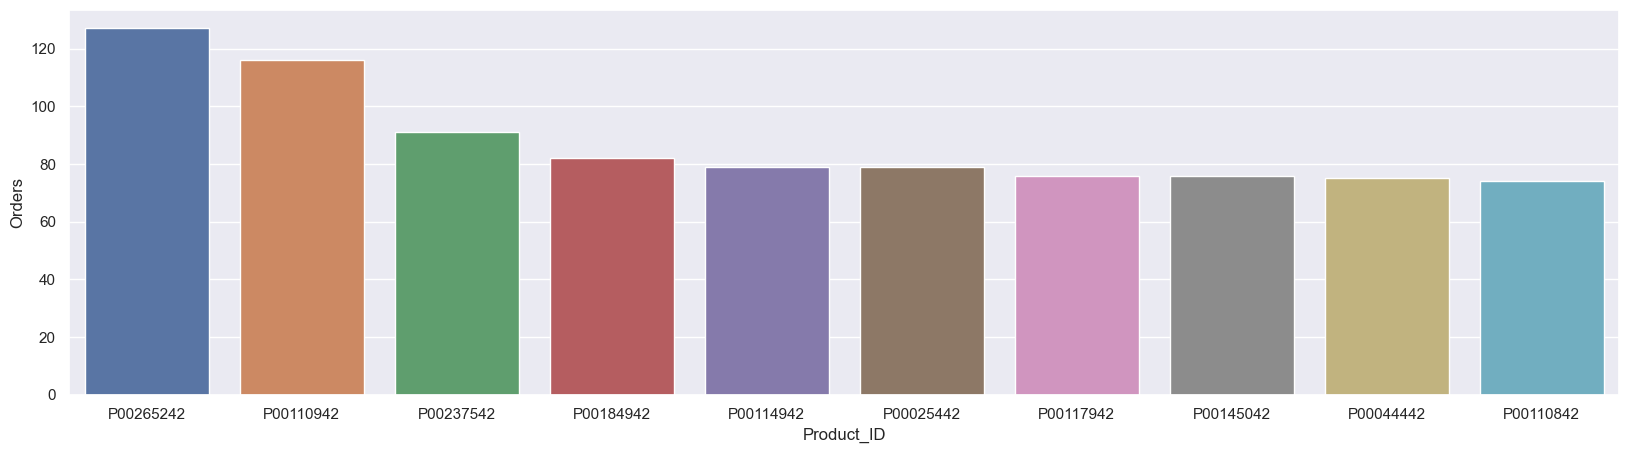

In [93]:
ProID_cate_spent = df.groupby(['Product_ID'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending= False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(x='Product_ID', y='Orders', data= ProID_cate_spent)

## Conclusion

- Age Group and Marital Status:
  - The primary buyers were married women aged between 26 and 35 years.
    
- Top States:
  - Uttar Pradesh, Maharashtra, and Karnataka were the leading states for purchas
  .
  
- Employment Sectors:
  - Significant portions of the buyers were employed in IT, Healthcare, and Aviation se
  ors.
  
- Product Categories:
  - The most frequently purchased products were from the Food, Clothing, and Electronics categories.
categories.